In [545]:
def double_to_single(f, S):
    right = S[S.size // 2:]
    left = S[:S.size // 2]
    positive = right[1:]
    negative = left[:-1][::-1]
    return f[S.size // 2 + 1:], positive + negative

In [717]:
f_sample = 512e6 / 2**14
f = 3 / 16 * f_sample
A = 2**5
N = 2**22
W = 1
t = np.arange(N) / f_sample
phi = np.random.random()
x = A * np.exp(2j * np.pi * (f * t + phi)) + W * (np.random.randn(N) + 1j * np.random.randn(N))
quantize = np.floor
r = quantize(x.real) + 1j * quantize(x.imag)
e = x - r
S_e, f_S = plt.mlab.psd(e, Fs=f_sample, NFFT=N // 8, noverlap=N // 16, window=plt.mlab.window_hanning)
S_r, _ = plt.mlab.psd(r, Fs=f_sample, NFFT=N // 8, noverlap=N // 16, window=plt.mlab.window_hanning)

In [718]:
n_center = np.argmin(np.abs(f - f_S))
S_rd = np.roll(S_r, -(n_center - f_S.size // 2))

In [722]:
# Why is this eight times larger than the real signal case with rounding?
# Taking the floor contributes a factor of 4 compared to rounding, because it's equivalent to doubling the LSB.
# Adding two uncorrelated variances (real and imaginary) gives another factor of two.
12 * np.trapz(S_e, x=f_S)

7.9980192935292527

fig, ax = plt.subplots()
#ax.set_xscale('symlog')
ax.set_yscale('log')
for k in range(-int(f_sample / (2 * f)), int(f_sample / (2 * f)) + 1):
    ax.axvline(k * f, color='gray')
ax.plot(f_S, S_r)
#ax.plot(f_S, S_e)
ax.set_ylim(1e-7, 1e0)

fig, ax = plt.subplots()
#ax.set_xscale('symlog')
ax.set_yscale('log')
ax.plot(f_S, S_rd)
#ax.plot(f_S, S_e)
ax.set_ylim(1e-9, 1e0)

In [720]:
f1, S1 = double_to_single(f_S, S_rd)

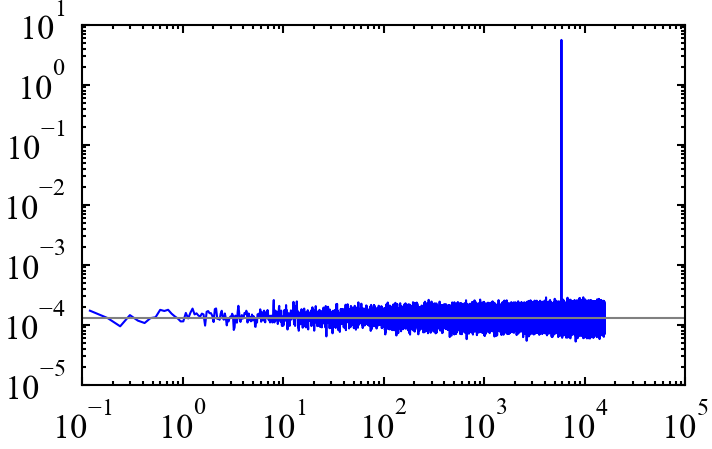

In [735]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(f1[1:], S1[1:])
ax.axhline(2 * 2 * W**2 / f_sample, color='gray')
#ax.set_ylim(1e-6, 1e0)